In [20]:
import json
from Utility.Plots import  plot_live_data, plot_train_data, plot_steps_taken
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from Utility.TabularEpsilonStrategy import EpsilonGreedy

import pickle
import numpy as np
# mpl.use('QtAgg')
%config InlineBackend.figure_formats = ['svg']
# plt.rcParams['animation.html'] = "jshtml"
from IPython.display import HTML


## Q-Learning

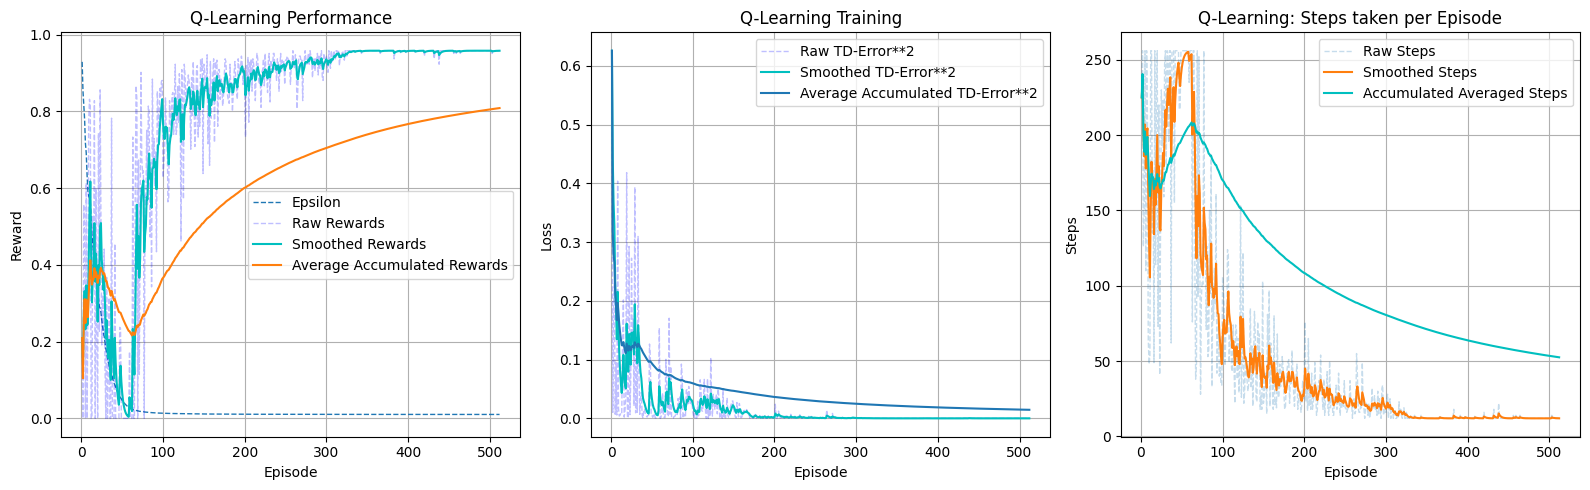

In [2]:
with open('Q_Learning/QLearning_live_plot.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))
plt.subplot(131)
plot_live_data(data['episode'], data['rewards'], epsilon=data['epsilons'],
          title={'title': "Q-Learning Performance", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                 'acc'  : 'Average Accumulated Rewards', 'xlab': 'Episode', 'ylab': 'Reward'})
plt.subplot(132)
plot_train_data(data['episode'], data['losses'],
          {'title': "Q-Learning Training", 'raw': 'Raw TD-Error**2', 'smooth': 'Smoothed TD-Error**2',
           'acc'  : 'Average Accumulated TD-Error**2', 'xlab': 'Episode', 'ylab': 'Loss'})
plt.subplot(133)
plot_steps_taken(data['episode'], data['steps_taken'], "Q-Learning")
plt.tight_layout()
# plt.savefig('report/figures/QLearning_episode.pdf')
plt.show()

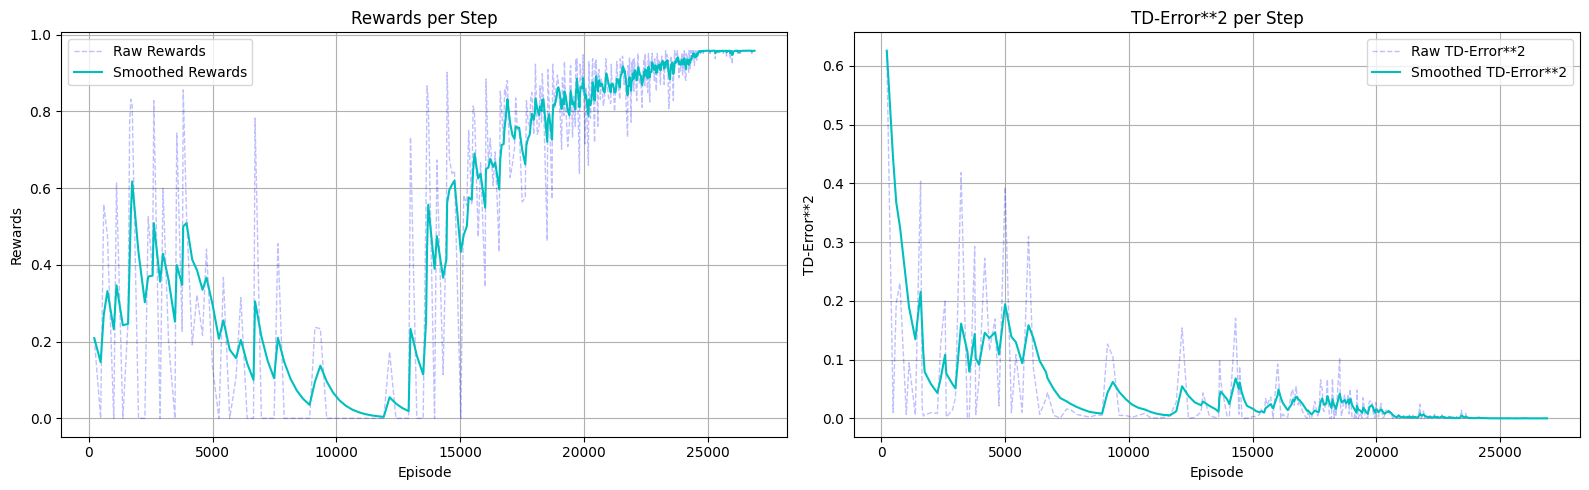

In [3]:
with open('Q_Learning/QLearning_train.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))

plt.subplot(121)
plot_live_data(data['steps_done'], data['rewards'], avg=False,
               title={'title': "Rewards per Step", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                      'acc': 'Cumulative Average Rewards', 'xlab': 'Episode', 'ylab': 'Rewards'})

plt.subplot(122)
plot_train_data(data['steps_done'], data['td_error_sq'], avg=False,
                title={'title': "TD-Error**2 per Step", 'raw': 'Raw TD-Error**2',
                       'smooth': 'Smoothed TD-Error**2', 'acc': 'Cumulative Average TD-Error**2',
                       'xlab': 'Episode', 'ylab': 'TD-Error**2'})
plt.tight_layout()
# plt.savefig('report/figures/QLearning_steps.pdf')
plt.show()

In [4]:
rewards = data['rewards']
steps_taken = data['steps_taken']
finish_counter = data['finish_counter']
episodes = len(rewards)
print('\n====== TRAIN SUMMARY ======')
print(f"Completion rate: {finish_counter/ episodes}")
print(f"Average Reward : {sum(rewards) / episodes:.3f}")
print(f"Average steps  : {sum(steps_taken) / episodes:.3f}")


====== TRAIN SUMMARY ======
Completion rate: 0.9296875
Average Reward : 0.808
Average steps  : 52.510


In [2]:
from Q_Learning.QLearning import  eval as qlearning_eval
from Utility.MiniGrid import MiniGridHash

pygame 2.6.0 (SDL 2.28.4, Python 3.10.14)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
env = MiniGridHash(render_mode='rgb_array')
with open('Q_Learning/q_learning_table.pkl', 'rb') as f:
    qlearning_table = pickle.load(f)
qlearning_eval(env, qlearning_table, EpsilonGreedy(0, 3), 1000)

Evaluation...
====== EVALUATION SUMMARY ======
Evaluation episodes: 1000
Completion rate    : 1.0
Average Reward     : 0.958
Average steps      : 12.000


In [36]:
imgs= [] 
fig = plt.figure(figsize=(5,5))
strategy = EpsilonGreedy(0, 3)
current_state = env.reset()
plt.axis('off')
im = plt.imshow(env.render(), animated=True)
imgs.append([im])
for step in range(env.maxSteps):
    action = strategy.select_action(current_state, qlearning_table)
    next_state, reward, done, truncated = env.step(action)
    im = plt.imshow(env.render(), animated=True)

    imgs.append([im])
    if done or truncated:
        break
    current_state = next_state
ani = animation.ArtistAnimation(fig, imgs, interval=100, repeat_delay=1000)
ani.save('Q_Learning/q_learning.gif', writer='imagemagickasd')
plt.close()
HTML(ani.to_jshtml())

MovieWriter imagemagickasd unavailable; using Pillow instead.


In [19]:
part1 = imgs[:5]
part2 = imgs[5:10]
part3 = imgs[10:]

## SARSA

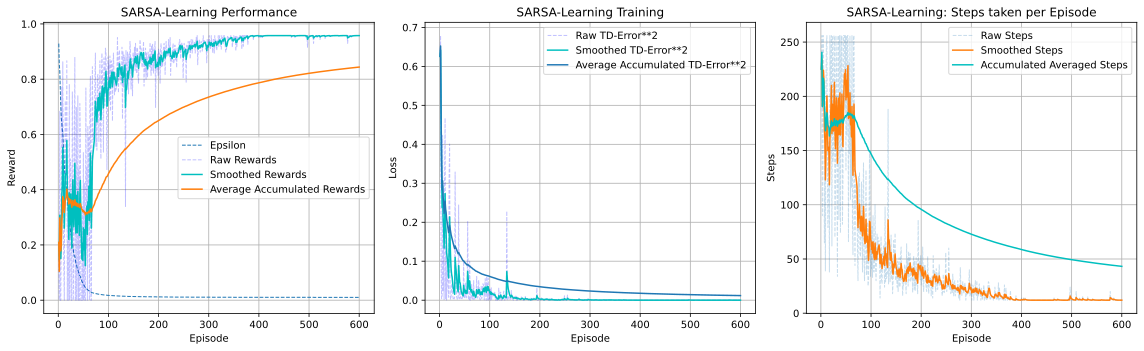

In [29]:
with open('SARSA/SARSA_live_plot.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))
plt.subplot(131)
plot_live_data(data['episode'], data['rewards'], epsilon=data['epsilons'],
          title={'title': "SARSA-Learning Performance", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                 'acc'  : 'Average Accumulated Rewards', 'xlab': 'Episode', 'ylab': 'Reward'})
plt.subplot(132)
plot_train_data(data['episode'], data['losses'],
          {'title': "SARSA-Learning Training", 'raw': 'Raw TD-Error**2', 'smooth': 'Smoothed TD-Error**2',
           'acc'  : 'Average Accumulated TD-Error**2', 'xlab': 'Episode', 'ylab': 'Loss'})
plt.subplot(133)
plot_steps_taken(data['episode'], data['steps_taken'], "SARSA-Learning")
plt.tight_layout()
plt.savefig('report/figures/SARSALearning_episode.pdf')
plt.show()

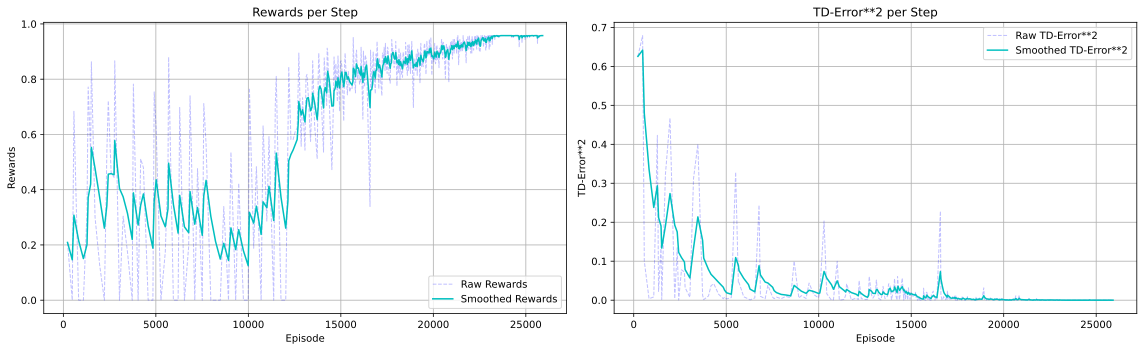

In [30]:
with open('SARSA/SARSA_train.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))

plt.subplot(121)
plot_live_data(data['steps_done'], data['rewards'], avg=False,
               title={'title': "Rewards per Step", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                      'acc': 'Cumulative Average Rewards', 'xlab': 'Episode', 'ylab': 'Rewards'})

plt.subplot(122)
plot_train_data(data['steps_done'], data['td_error_sq'], avg=False,
                title={'title': "TD-Error**2 per Step", 'raw': 'Raw TD-Error**2',
                       'smooth': 'Smoothed TD-Error**2', 'acc': 'Cumulative Average TD-Error**2',
                       'xlab': 'Episode', 'ylab': 'TD-Error**2'})
plt.tight_layout()
plt.savefig('report/figures/SARSALearning_steps.pdf')
plt.show()

In [31]:
rewards = data['rewards']
steps_taken = data['steps_taken']
finish_counter = data['finish_counter']
episodes = len(rewards)
print('\n====== TRAIN SUMMARY ======')
print(f"Completion rate: {finish_counter/ episodes}")
print(f"Average Reward : {sum(rewards) / episodes:.3f}")
print(f"Average steps  : {sum(steps_taken) / episodes:.3f}")


====== TRAIN SUMMARY ======
Completion rate: 0.9566666666666667
Average Reward : 0.844
Average steps  : 43.185


## DQN

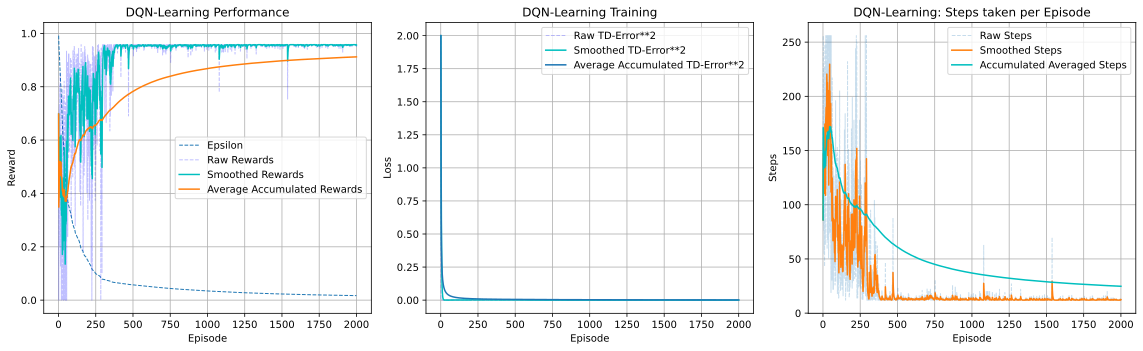

In [32]:
with open('DQN/DQN_live_plot.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))
plt.subplot(131)
plot_live_data(data['episode'], data['rewards'], epsilon=data['epsilons'],
          title={'title': "DQN-Learning Performance", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                 'acc'  : 'Average Accumulated Rewards', 'xlab': 'Episode', 'ylab': 'Reward'})
plt.subplot(132)
plot_train_data(data['episode'], data['losses'],
          {'title': "DQN-Learning Training", 'raw': 'Raw TD-Error**2', 'smooth': 'Smoothed TD-Error**2',
           'acc'  : 'Average Accumulated TD-Error**2', 'xlab': 'Episode', 'ylab': 'Loss'})
plt.subplot(133)
plot_steps_taken(data['episode'], data['steps_taken'], "DQN-Learning")
plt.tight_layout()
plt.savefig('report/figures/DQNLearning_episode.pdf')
plt.show()

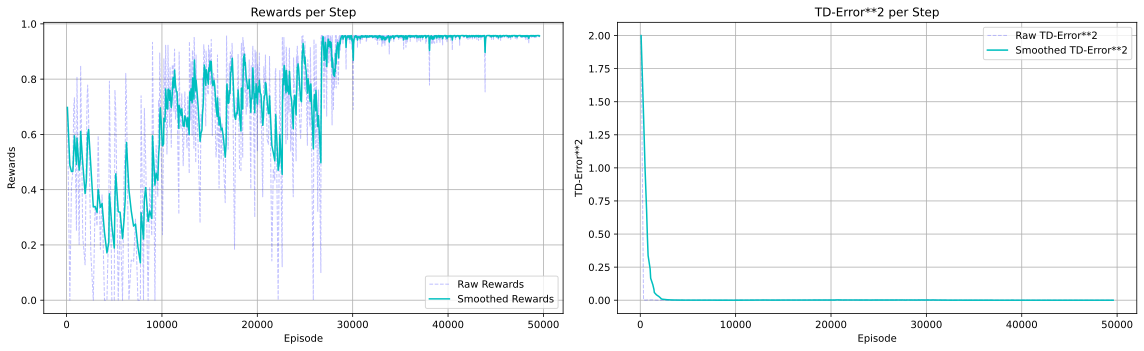

In [33]:
with open('DQN/DQN_train.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))

plt.subplot(121)
plot_live_data(data['steps_done'], data['rewards'], avg=False,
               title={'title': "Rewards per Step", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                      'acc': 'Cumulative Average Rewards', 'xlab': 'Episode', 'ylab': 'Rewards'})

plt.subplot(122)
plot_train_data(data['steps_done'], data['td_error_sq'], avg=False,
                title={'title': "TD-Error**2 per Step", 'raw': 'Raw TD-Error**2',
                       'smooth': 'Smoothed TD-Error**2', 'acc': 'Cumulative Average TD-Error**2',
                       'xlab': 'Episode', 'ylab': 'TD-Error**2'})
plt.tight_layout()
plt.savefig('report/figures/DQNLearning_steps.pdf')
plt.show()

In [34]:
rewards = data['rewards']
steps_taken = data['steps_taken']
finish_counter = data['finish_counter']
episodes = len(rewards)
print('\n====== TRAIN SUMMARY ======')
print(f"Completion rate: {finish_counter/ episodes}")
print(f"Average Reward : {sum(rewards) / episodes:.3f}")
print(f"Average steps  : {sum(steps_taken) / episodes:.3f}")


====== TRAIN SUMMARY ======
Completion rate: 0.992
Average Reward : 0.912
Average steps  : 24.794


## DQN RGB Technique

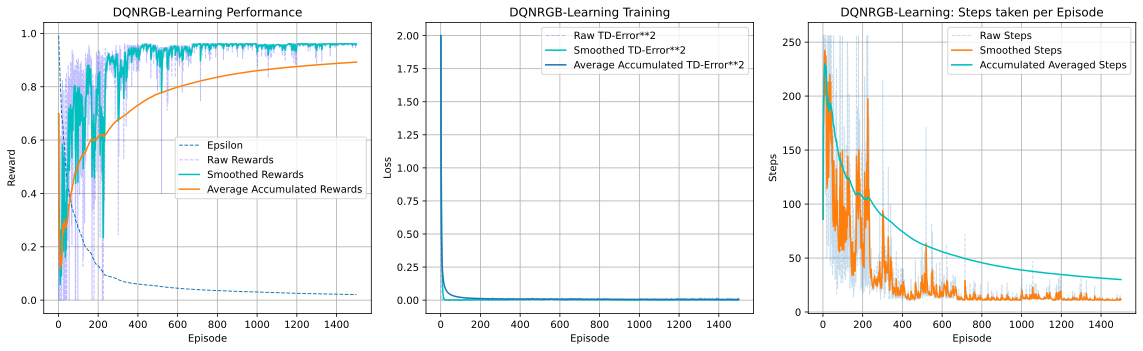

In [35]:
with open('DQN/DQNIMAGE_live_plot.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))
plt.subplot(131)
plot_live_data(data['episode'], data['rewards'], epsilon=data['epsilons'],
          title={'title': "DQNRGB-Learning Performance", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                 'acc'  : 'Average Accumulated Rewards', 'xlab': 'Episode', 'ylab': 'Reward'})
plt.subplot(132)
plot_train_data(data['episode'], data['losses'],
          {'title': "DQNRGB-Learning Training", 'raw': 'Raw TD-Error**2', 'smooth': 'Smoothed TD-Error**2',
           'acc'  : 'Average Accumulated TD-Error**2', 'xlab': 'Episode', 'ylab': 'Loss'})
plt.subplot(133)
plot_steps_taken(data['episode'], data['steps_taken'], "DQNRGB-Learning")
plt.tight_layout()
plt.savefig('report/figures/DQNRGBLearning_episode.pdf')
plt.show()

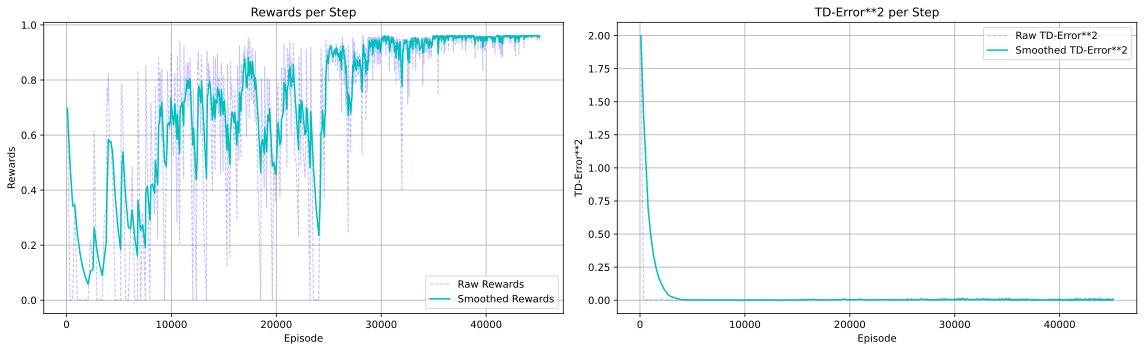

In [36]:
with open('DQN/DQNIMAGE_train.json', 'r') as f:
    data = json.load(f)

plt.figure(figsize=(16, 5))

plt.subplot(121)
plot_live_data(data['steps_done'], data['rewards'], avg=False,
               title={'title': "Rewards per Step", 'raw': 'Raw Rewards', 'smooth': 'Smoothed Rewards',
                      'acc': 'Cumulative Average Rewards', 'xlab': 'Episode', 'ylab': 'Rewards'})

plt.subplot(122)
plot_train_data(data['steps_done'], data['td_error_sq'], avg=False,
                title={'title': "TD-Error**2 per Step", 'raw': 'Raw TD-Error**2',
                       'smooth': 'Smoothed TD-Error**2', 'acc': 'Cumulative Average TD-Error**2',
                       'xlab': 'Episode', 'ylab': 'TD-Error**2'})
plt.tight_layout()
plt.savefig('report/figures/DQNRGBLearning_steps.pdf')
plt.show()

In [37]:
rewards = data['rewards']
steps_taken = data['steps_taken']
finish_counter = data['finish_counter']
episodes = len(rewards)
print('\n====== TRAIN SUMMARY ======')
print(f"Completion rate: {finish_counter/ episodes}")
print(f"Average Reward : {sum(rewards) / episodes:.3f}")
print(f"Average steps  : {sum(steps_taken) / episodes:.3f}")


====== TRAIN SUMMARY ======
Completion rate: 0.98
Average Reward : 0.892
Average steps  : 30.068
